In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Training Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Testing Accuracy: 0.9555555555555556
Training Accuracy: 1.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
abc = AdaBoostClassifier(n_estimators=50,estimator=NB,learning_rate=1)
model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Training Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Testing Accuracy: 0.9333333333333333
Training Accuracy: 1.0


Create Synthetic Dataset

In [ ]:
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
model = AdaBoostClassifier()
cvs = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores = cross_val_score(model,X,y,scoring='accuracy',cv=cvs,n_jobs=-1,error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))

Accuracy: 0.798 (0.034)


In [ ]:
X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
print(X[1])

[-2.42264447e+00  1.49687583e+00 -8.01106833e-01  2.06453050e+00
 -8.76754500e+00 -2.51286558e+00  1.40156770e+00  4.79941043e+00
  1.39750172e+00 -5.62485856e-01 -6.03669967e-01 -3.12565915e+00
 -3.18175570e+00 -2.94187480e+00 -6.81902846e-03 -4.65861153e+00
 -6.38341467e+00  1.14726175e+00 -2.86306705e+00 -2.75750181e-01]


In [ ]:
model = AdaBoostClassifier()
model.fit(X,y)
row = [[-2.42264447, 1.49687583, -8.01106833, 2.06453050, -8.76754500, -2.51286558, 1.40156770, 4.79941043, 1.39750172, -5.62485856, -6.03669967, -3.12565915, -3.18175570, -2.94187480, -6.81902846, -4.65861153, -6.38341467, 1.14726175, -2.86306705, -2.75750181]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
def get_datasets():
  X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
  return X,y
def get_model():
  models = dict()
  for i in range(1,11):
    base = DecisionTreeClassifier(max_depth=1)
    models[str(i)] = AdaBoostClassifier(estimator=base)
  return models

def evaluate_model(model,X,y):
  cvs = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
  scores = cross_val_score(model,X,y,scoring='accuracy',cv=cvs,n_jobs=-1)
  return scores

>1 0.798 (0.034)
>2 0.853 (0.033)
>3 0.894 (0.035)
>4 0.911 (0.027)
>5 0.923 (0.026)
>6 0.931 (0.019)
>7 0.934 (0.027)
>8 0.931 (0.020)
>9 0.936 (0.022)
>10 0.931 (0.029)


<ipython-input-18-c1ba45db270a>:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


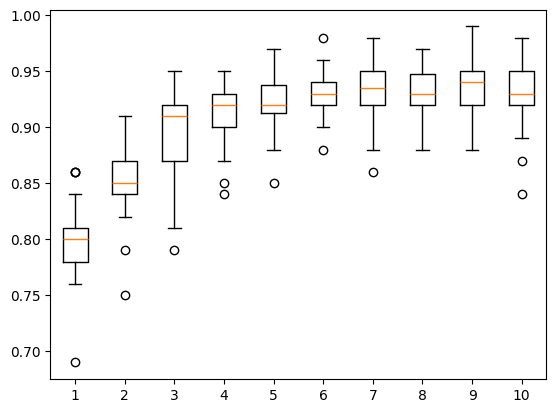

In [ ]:
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import mean, std

def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
  return X, y

def get_models():
  models = dict()
  for i in range(1, 11):
    base = DecisionTreeClassifier(max_depth=i)
    models[str(i)] = AdaBoostClassifier(estimator=base)
  return models

def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names)
pyplot.show()

>1 0.798 (0.034)
>2 0.798 (0.034)
>3 0.798 (0.034)
>4 0.798 (0.034)
>5 0.798 (0.034)
>6 0.798 (0.034)
>7 0.798 (0.034)
>8 0.798 (0.034)
>9 0.798 (0.034)
>10 0.798 (0.034)


<ipython-input-12-884bf6ce4963>:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


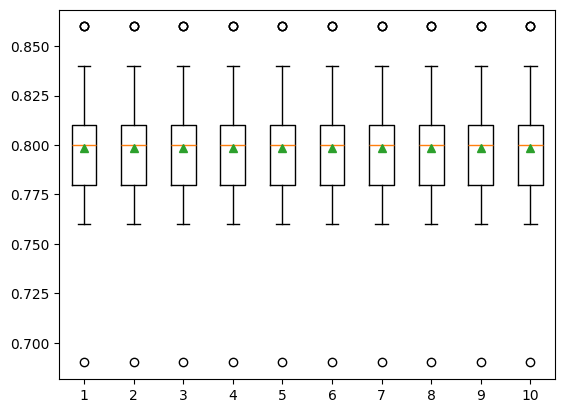

In [ ]:
from matplotlib import pyplot
from numpy import mean, std
X, y = get_datasets()
models = get_model()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)  # Append scores to results
    names.append(name)  # Append name to names
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10,50,100,500]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1.0]
cvs = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cvs,scoring='accuracy')
grid_result = grid_search.fit(X,y)
print('Best: %f using %s' % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
  print('%f (%f) with: %r' % (mean,stdev,param))

Best: 0.811667 using {'learning_rate': 1.0, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.646333 (0.036376) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.646667 (0.036545) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.646333 (0.036376) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.646333 (0.036376) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.645667 (0.036119) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.651333 (0.039811) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.644667 (0.036399) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.651333 (0.039811) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.683333 (0.053125) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.751667 (0.049267) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.709667 (0.054190) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.753000

# Evaluation Part

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X,y = make_regression(n_samples=1000,n_features=20,n_informative=15,noise=0.1,random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model = AdaBoostRegressor(n_estimators=50,learning_rate=1)
model.fit(X,y)
y_pred = model.predict(X_test)
print("R2 Score:- ",metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error:- ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:- ",metrics.mean_squared_error(y_test,y_pred))

R2 Score:-  0.7929433241354458
Mean Absolute Error:-  62.86954194464829
Mean Squared Error:-  6104.559895202014


>1 -0.011 (0.002)
>2 -0.011 (0.002)
>3 -0.011 (0.002)
>4 -0.011 (0.002)
>5 -0.011 (0.002)
>6 -0.011 (0.002)
>7 -0.011 (0.002)
>8 -0.011 (0.002)
>9 -0.011 (0.002)
>10 -0.011 (0.002)


<ipython-input-24-3058c14187f2>:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


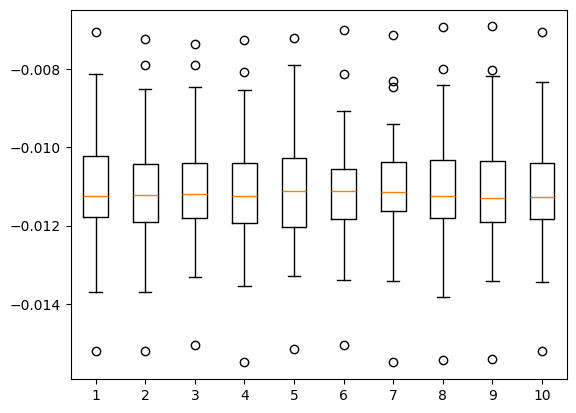

In [ ]:
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, cross_val_score
from numpy import mean, std

def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
    return X, y

def get_models():
    models = dict()
    for i in range(1, 11):
        base = LinearRegression()
        models[str(i)] = AdaBoostRegressor(estimator=base, n_estimators=50)
    return models

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names)
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
abc = AdaBoostClassifier(n_estimators=50,estimator=lr,learning_rate=1)
model = abc.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Testing Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Training Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

>1 0.789 (0.041)
>2 0.789 (0.041)
>3 0.789 (0.041)
>4 0.789 (0.041)
>5 0.789 (0.041)
>6 0.789 (0.041)
>7 0.789 (0.041)
>8 0.789 (0.041)
>9 0.789 (0.041)
>10 0.789 (0.041)


<ipython-input-29-3dbde8359b9b>:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names)


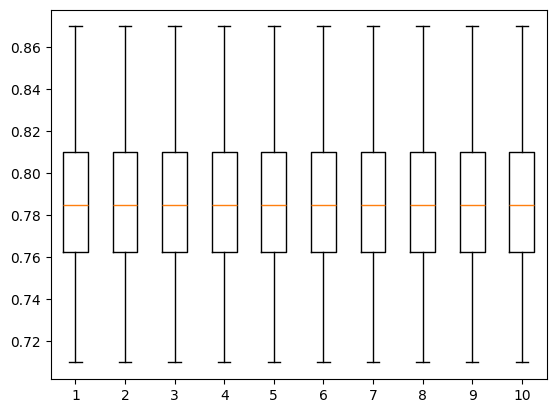

In [ ]:
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier  # Changed to AdaBoostClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold, cross_val_score
from numpy import mean, std

def get_dataset():
    X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=6)
    return X, y

def get_models():
    models = dict()
    for i in range(1, 11):
        base = LogisticRegression()
        models[str(i)] = AdaBoostClassifier(estimator=base, n_estimators=50)  # Changed to AdaBoostClassifier
    return models

def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names)
pyplot.show()